---
---
## Trabajo Práctico 6 - Test de Hipótesis
---
---

La diabetes se diagnostica en base al nivel de glucosa en sangre. Según la base de datos de indios Pima la glucosa en sangre de personas sanas tiene una media $\mu_0 = 110.6\:mg/dl$ y una desviación estándar $\sigma_0 = 24.8\:mg/dl$. Para personas con diabetes la media es $\mu_1 = 142.3\:mg/dl$ y la desviación estándar $\sigma_1 = 29.6\:mg/dl$. Asumir que la glucosa en sangre para personas sanas y con diabetes sigue una distribución normal. Siguiendo las recomendaciones de la Organización Mundial de la Salud, a una persona se le diagnostica diabetes si su nivel de glucosa en sangre excede $126\:mg/dl$. Graficar las distribuciones de la glucosa en sangre para las hipótesis nula y alternativa. Indicar en la figura el valor crítico de la glucosa en sangre.

  Calcular la precisión del test de glucosa en sangre, la probabilidad que
un paciente sano sea diagnosticado como diabético (falso positivo) y la
probabilidad que un paciente diabético sea diagnosticado como sano (falso negativo). Si la prevalencia de la diabetes es del $35\%$, calcular
aplicando el teorema de Bayes, la probabilidad que una persona con
un test positivo efectivamente tenga diabetes.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

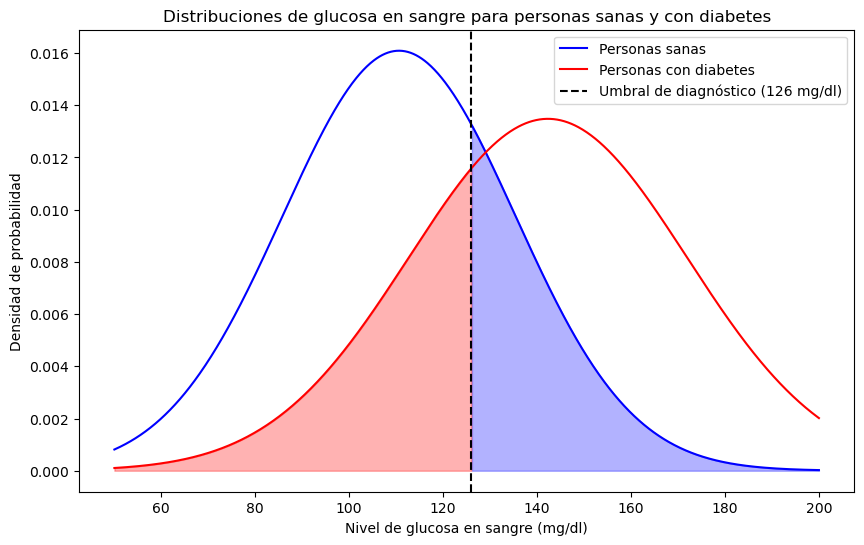

In [8]:
# Parámetros de las distribuciones
mu_0 = 110.6
sigma_0 = 24.8
mu_1 = 142.3
sigma_1 = 29.6
glucose_threshold = 126

# Graficar las distribuciones
x = np.linspace(50, 200, 1000)
pdf_healthy = norm.pdf(x, mu_0, sigma_0)
pdf_diabetic = norm.pdf(x, mu_1, sigma_1)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_healthy, label='Personas sanas', color='blue')
plt.plot(x, pdf_diabetic, label='Personas con diabetes', color='red')
plt.axvline(glucose_threshold, color='black', linestyle='--', label='Umbral de diagnóstico (126 mg/dl)')

# Plot región crítica
plt.fill_between(x[x > glucose_threshold], 0, pdf_healthy[x > glucose_threshold], alpha=0.3, color='blue')
plt.fill_between(x[x < glucose_threshold], 0, pdf_diabetic[x < glucose_threshold], alpha=0.3, color='red')

plt.xlabel('Nivel de glucosa en sangre (mg/dl)')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribuciones de glucosa en sangre para personas sanas y con diabetes')
plt.legend()
plt.show()

In [11]:
# Calcular la precisión del test
# Falso positivo: P(X > 126 | sano)
false_positive_rate = 1 - norm.cdf(glucose_threshold, mu_0, sigma_0)

# Falso negativo: P(X <= 126 | diabético)
false_negative_rate = norm.cdf(glucose_threshold, mu_1, sigma_1)

# Precisión del test
# Verdadero positivo: P(X > 126 | diabético)
true_positive_rate = 1 - false_negative_rate

# Verdadero negativo: P(X <= 126 | sano)
true_negative_rate = 1 - false_positive_rate


print(f'Falso positivo: {false_positive_rate:.4f}')
print(f'Falso negativo: {false_negative_rate:.4f}')
print(f'Precisión del test: {true_positive_rate:.4f}')
print(f'Especificidad del test: {true_negative_rate:.4f}')

Falso positivo: 0.2673
Falso negativo: 0.2909
Precisión del test: 0.7091
Especificidad del test: 0.7327


Probabilidad de tener diabetes dado un test positivo (Teorema de Bayes)

P(diabetes | test positivo) = P(test positivo | diabetes) * P(diabetes) / P(test positivo)

P(test positivo) = P(test positivo | diabetes) * P(diabetes) + P(test positivo | sano) * P(sano)

In [10]:
# Prevalencia de la diabetes
prevalence = 0.35

p_test_positive = true_positive_rate * prevalence + false_positive_rate * (1 - prevalence)
p_diabetes_given_positive = (true_positive_rate * prevalence) / p_test_positive

print(f'Probabilidad de tener diabetes dado un test positivo: {p_diabetes_given_positive:.4f}')

Probabilidad de tener diabetes dado un test positivo: 0.5882
